In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Clean Our Data Sources To Only Include Road Closures

## Twitter Data

In [3]:
twitter = pd.read_csv('./GeoCoding Data/tweets_with_geo.csv')
twitter.head(3)

,Index,User,Text,Date,Favorites,Retweets,Mentions,HashTags,streets,highways,exits,markers,road_closed,predictions,query,query_string,lat,lng,query_score,field_score
0,591,iembot_lch,"At 4:45 PM CDT, Burns Point [St. Mary Co, LA] ...",2020-08-27 21:47:48+00:00,0,0,NaN,NaN,[],['highway 317'],[],[],0.0,0.0,'highway 317',highway+317,29.66254,-91.48872,0.99,"{'state': 0.89, 'streets': [1.0]}"
1,646,TotalTrafficBTR,Downed tree cleared in #WestBatonRouge on I 10...,2020-08-27 11:50:43+00:00,0,0,NaN,#WestBatonRouge #traffic,[],[],"['exit 151', 'exit 139']",[],NaN,0.0,"'exit 151', 'exit 139'",exit+151%2C++exit+139,30.57016,-92.07275,0.68,"{'state': 0.89, 'streets': [0.3], 'houseNumber..."
2,402,TotalTrafficHOU,Accident. two left lanes blocked in #Spring on...,2020-08-30 16:00:43+00:00,0,0,NaN,#Spring #traffic,[],['i-45'],[],[],1.0,1.0,'i-45',i-45,30.44335,-91.18664,0.73,{'state': 0.89}


#### Convert Date to Datetime

In [24]:
twitter['Date'] = pd.to_datetime(twitter['Date'])

#### Filter by Days of Hurricane Laura & Road Closures

In [32]:
#save as a new dataframe
twitter_closures = twitter[(twitter['Date'] >= '2020-08-27') & (twitter['Date'] <= '2020-08-29') & (twitter['predictions'] == 1.0)]

#### Check the Quality of the Query Score

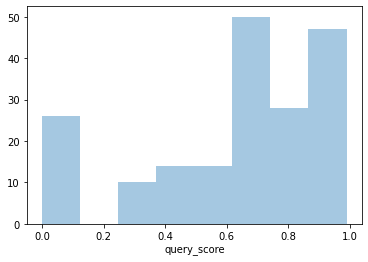

In [37]:
sns.distplot(twitter_closures['query_score'], kde=False);

In [41]:
#Let's use a query_score of 0.6 and above to plot on the map
twitter_closures = twitter_closures[twitter_closures['query_score'] >= 0.6]

In [43]:
# save as a csv 
twitter_closures.to_csv('./Mapping_The_Data/twitter_mapping_data.csv', index=False)

## HERE API Data

In [4]:
here = pd.read_csv('./GeoCoding Data/here_api_data.csv')
here.head(3)

,TRAFFIC_ITEM_ID,ORIGINAL_TRAFFIC_ITEM_ID,TRAFFIC_ITEM_STATUS_SHORT_DESC,TRAFFIC_ITEM_TYPE_DESC,START_TIME,END_TIME,ENTRY_TIME,VERIFIED,CRITICAL_VALS,INCIDENT_TYPE,LATITUDE_START,LONGITUDE_START,LATITUDE_END,LONGITUDE_END,ROAD_CLOSED,TRAFFIC_DESC
0,3798248000588304094,3124104410382626491,ACTIVE,MISCELLANEOUS,"August 29, 2020 8:37:43 AM CDT","September 16, 2020 1:29:30 AM CDT","September 15, 2020 11:29:46 PM CDT",True,minor,NaN,30.21861,-93.32553,30.18356,-93.37612,False,Lane blocked
1,3315771682021071064,3331121809586964207,ACTIVE,CONSTRUCTION,"September 15, 2020 11:32:46 PM CDT","September 16, 2020 4:30:18 AM CDT","September 15, 2020 11:32:46 PM CDT",True,critical,construction,29.71297,-94.98707,29.70945,-94.98721,True,Closed due to road construction
2,190895852957661665,3524764879614559312,ACTIVE,ROAD_CLOSURE,"August 28, 2020 3:47:21 PM CDT","September 16, 2020 4:29:30 AM CDT","September 15, 2020 11:29:46 PM CDT",True,critical,NaN,30.65546,-93.41246,30.76707,-93.53879,True,Closed


#### Convert Dates to Datetime

In [54]:
here['START_TIME'] = pd.to_datetime(here['START_TIME'])
here['END_TIME'] = pd.to_datetime(here['END_TIME'])
here['ENTRY_TIME'] = pd.to_datetime(here['ENTRY_TIME'])

#### Filter by Days of Hurricane Laura & Road Closures

In [60]:
#save as a new dataframe
here_closures = here[(here['START_TIME'] >= '2020-08-27') & (here['START_TIME'] <= '2020-08-29') & (here['ROAD_CLOSED'] == True)]

In [61]:
#save as a csv
here_closures.to_csv('./Mapping_The_Data/here_mapping_data.csv', index=False)

## LADOT Feed Data

In [5]:
ladot = pd.read_csv('./GeoCoding Data/ladot_feed_with_geo.csv')
ladot.head(3)

,date,closed,report,query_string,lat,lng,query_score,field_score
0,9/11/2020,NaN,I-10 Eastbound and Westbound from MM 103 (I-49...,I-10+Eastbound+and+Westbound+from+MM+103+(I-49...,0.0,0.0,0.0,0.0
1,9/11/2020,NaN,"I-10 WB from MM 103 to MM 104, St. Martin Pari...","I-10+WB+from+MM+103+to+MM+104,+St.+Martin+Pari...",0.0,0.0,0.0,0.0
2,9/11/2020,NaN,I-10- Partial Road Closure - Project #: H.0110...,I-10-+Partial+Road+Closure+-+Project+#:+H.0110...,0.0,0.0,0.0,0.0


#### Convert Date to Datetime

In [66]:
ladot['date'] = pd.to_datetime(ladot['date'])

#### Filter by Days of Hurricane Laura & Road Closures

In [67]:
#save as a new dataframe
ladot_closures = ladot[(ladot['date'] >= '2020-08-27') & (ladot['date'] <= '2020-08-29') & (ladot['closed'] == 1.0)]

#### Check the Quality of the Query Score

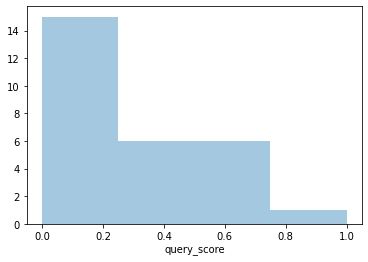

In [70]:
sns.distplot(ladot_closures['query_score'], kde=False);

In [71]:
#Let's use a query_score of 0.4 and above to plot on the map
ladot_closures = ladot_closures[ladot_closures['query_score'] >= 0.4]

In [72]:
# save as a csv 
ladot_closures.to_csv('./Mapping_The_Data/ladot_mapping_data.csv', index=False)